In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-polluted-country-report/most-polluted-countries.csv


In [ ]:
df = pd.read_csv('/kaggle/input/world-polluted-country-report/most-polluted-countries.csv')

In [ ]:
df.head()

,pollution_2023,pollution_growth_Rate,country_name,ccn3,country_region,united_nation_Member,country_land_Area_in_Km,pollution_density_in_km,pollution_density_per_Mile,share_borders,pollution_Rank,mostPollutedCountries_particlePollution
0,1428627663,0.00808,India,356,Asia,True,2973190.0,480.5033,1244.5036,"AFG, BGD, BTN, MMR, CHN, NPL, PAK, LKA",1,58.08
1,1425671352,-0.00015,China,156,Asia,True,9424702.9,151.2696,391.7884,"AFG, BTN, MMR, HKG, IND, KAZ, PRK, KGZ, LAO, M...",2,39.12
2,339996563,0.00505,United States,840,North America,True,9147420.0,37.1686,96.2666,"CAN, MEX",3,9.04
3,277534122,0.00738,Indonesia,360,Asia,True,1877519.0,147.8196,382.8528,"TLS, MYS, PNG",4,51.71
4,240485658,0.01976,Pakistan,586,Asia,True,770880.0,311.9625,807.9829,"AFG, CHN, IND, IRN",5,65.81


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 12 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   pollution_2023                           96 non-null     int64  
 1   pollution_growth_Rate                    96 non-null     float64
 2   country_name                             96 non-null     object 
 3   ccn3                                     96 non-null     int64  
 4   country_region                           96 non-null     object 
 5   united_nation_Member                     96 non-null     bool   
 6   country_land_Area_in_Km                  96 non-null     float64
 7   pollution_density_in_km                  96 non-null     float64
 8   pollution_density_per_Mile               96 non-null     float64
 9   share_borders                            85 non-null     object 
 10  pollution_Rank                           96 non-null

null values in share_borders; not removing the columns as the null values dont affect analysis.

In [ ]:
df.duplicated().sum()

0

No duplicated rows.

In [ ]:
df.describe(include='all')

,pollution_2023,pollution_growth_Rate,country_name,ccn3,country_region,united_nation_Member,country_land_Area_in_Km,pollution_density_in_km,pollution_density_per_Mile,share_borders,pollution_Rank,mostPollutedCountries_particlePollution
count,9.600000e+01,96.000000,96,96.000000,96,96,9.600000e+01,96.000000,96.000000,85,96.000000,96.000000
unique,NaN,NaN,96,NaN,6,2,NaN,NaN,NaN,83,NaN,NaN
top,NaN,NaN,India,NaN,Asia,True,NaN,NaN,NaN,GBR,NaN,NaN
freq,NaN,NaN,1,NaN,37,92,NaN,NaN,NaN,2,NaN,NaN
mean,7.405002e+07,0.007062,NaN,402.822917,NaN,NaN,1.088409e+06,562.915979,1457.952382,NaN,72.250000,22.152500
std,2.083376e+08,0.013354,NaN,251.466687,NaN,NaN,2.518835e+06,2428.297828,6289.291376,NaN,51.809164,14.478306
min,3.753180e+05,-0.074480,NaN,4.000000,NaN,NaN,3.290000e+01,2.213300,5.732300,NaN,1.000000,3.300000
25%,5.881984e+06,0.001303,NaN,190.250000,NaN,NaN,6.213750e+04,44.683800,115.731025,NaN,26.500000,11.272500
50%,1.976120e+07,0.006790,NaN,386.000000,NaN,NaN,2.304400e+05,104.621200,270.968850,NaN,64.500000,19.540000
75%,5.565119e+07,0.012140,NaN,617.000000,NaN,NaN,7.740505e+05,226.557775,586.784625,NaN,115.250000,25.272500


Several outliers are present.
Asia is the most frequent Continent.

Text(0, 0.5, 'Frequency')

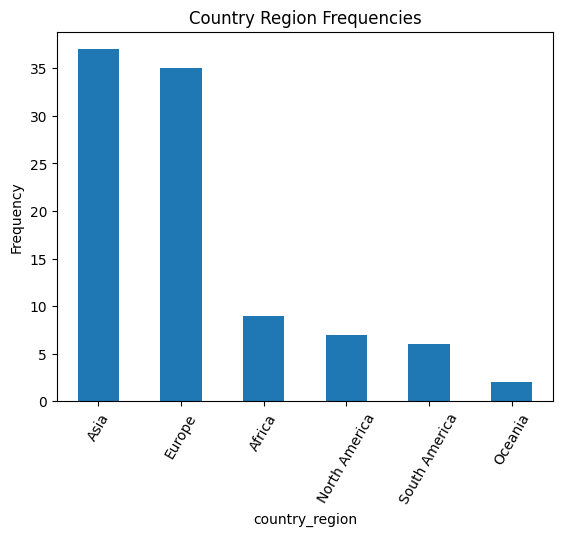

In [ ]:
df.country_region.value_counts().plot.bar()
plt.title('Country Region Frequencies')
plt.xticks(rotation=60)
plt.ylabel('Frequency')

In [ ]:
asia = df[df.country_region=='Asia']
europe = df[df.country_region=='Europe']
africa = df[df.country_region=='Africa']
north_am = df[df.country_region=='North America']
south_am = df[df.country_region=='South America']
oceania = df[df.country_region=='Oceania']


<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


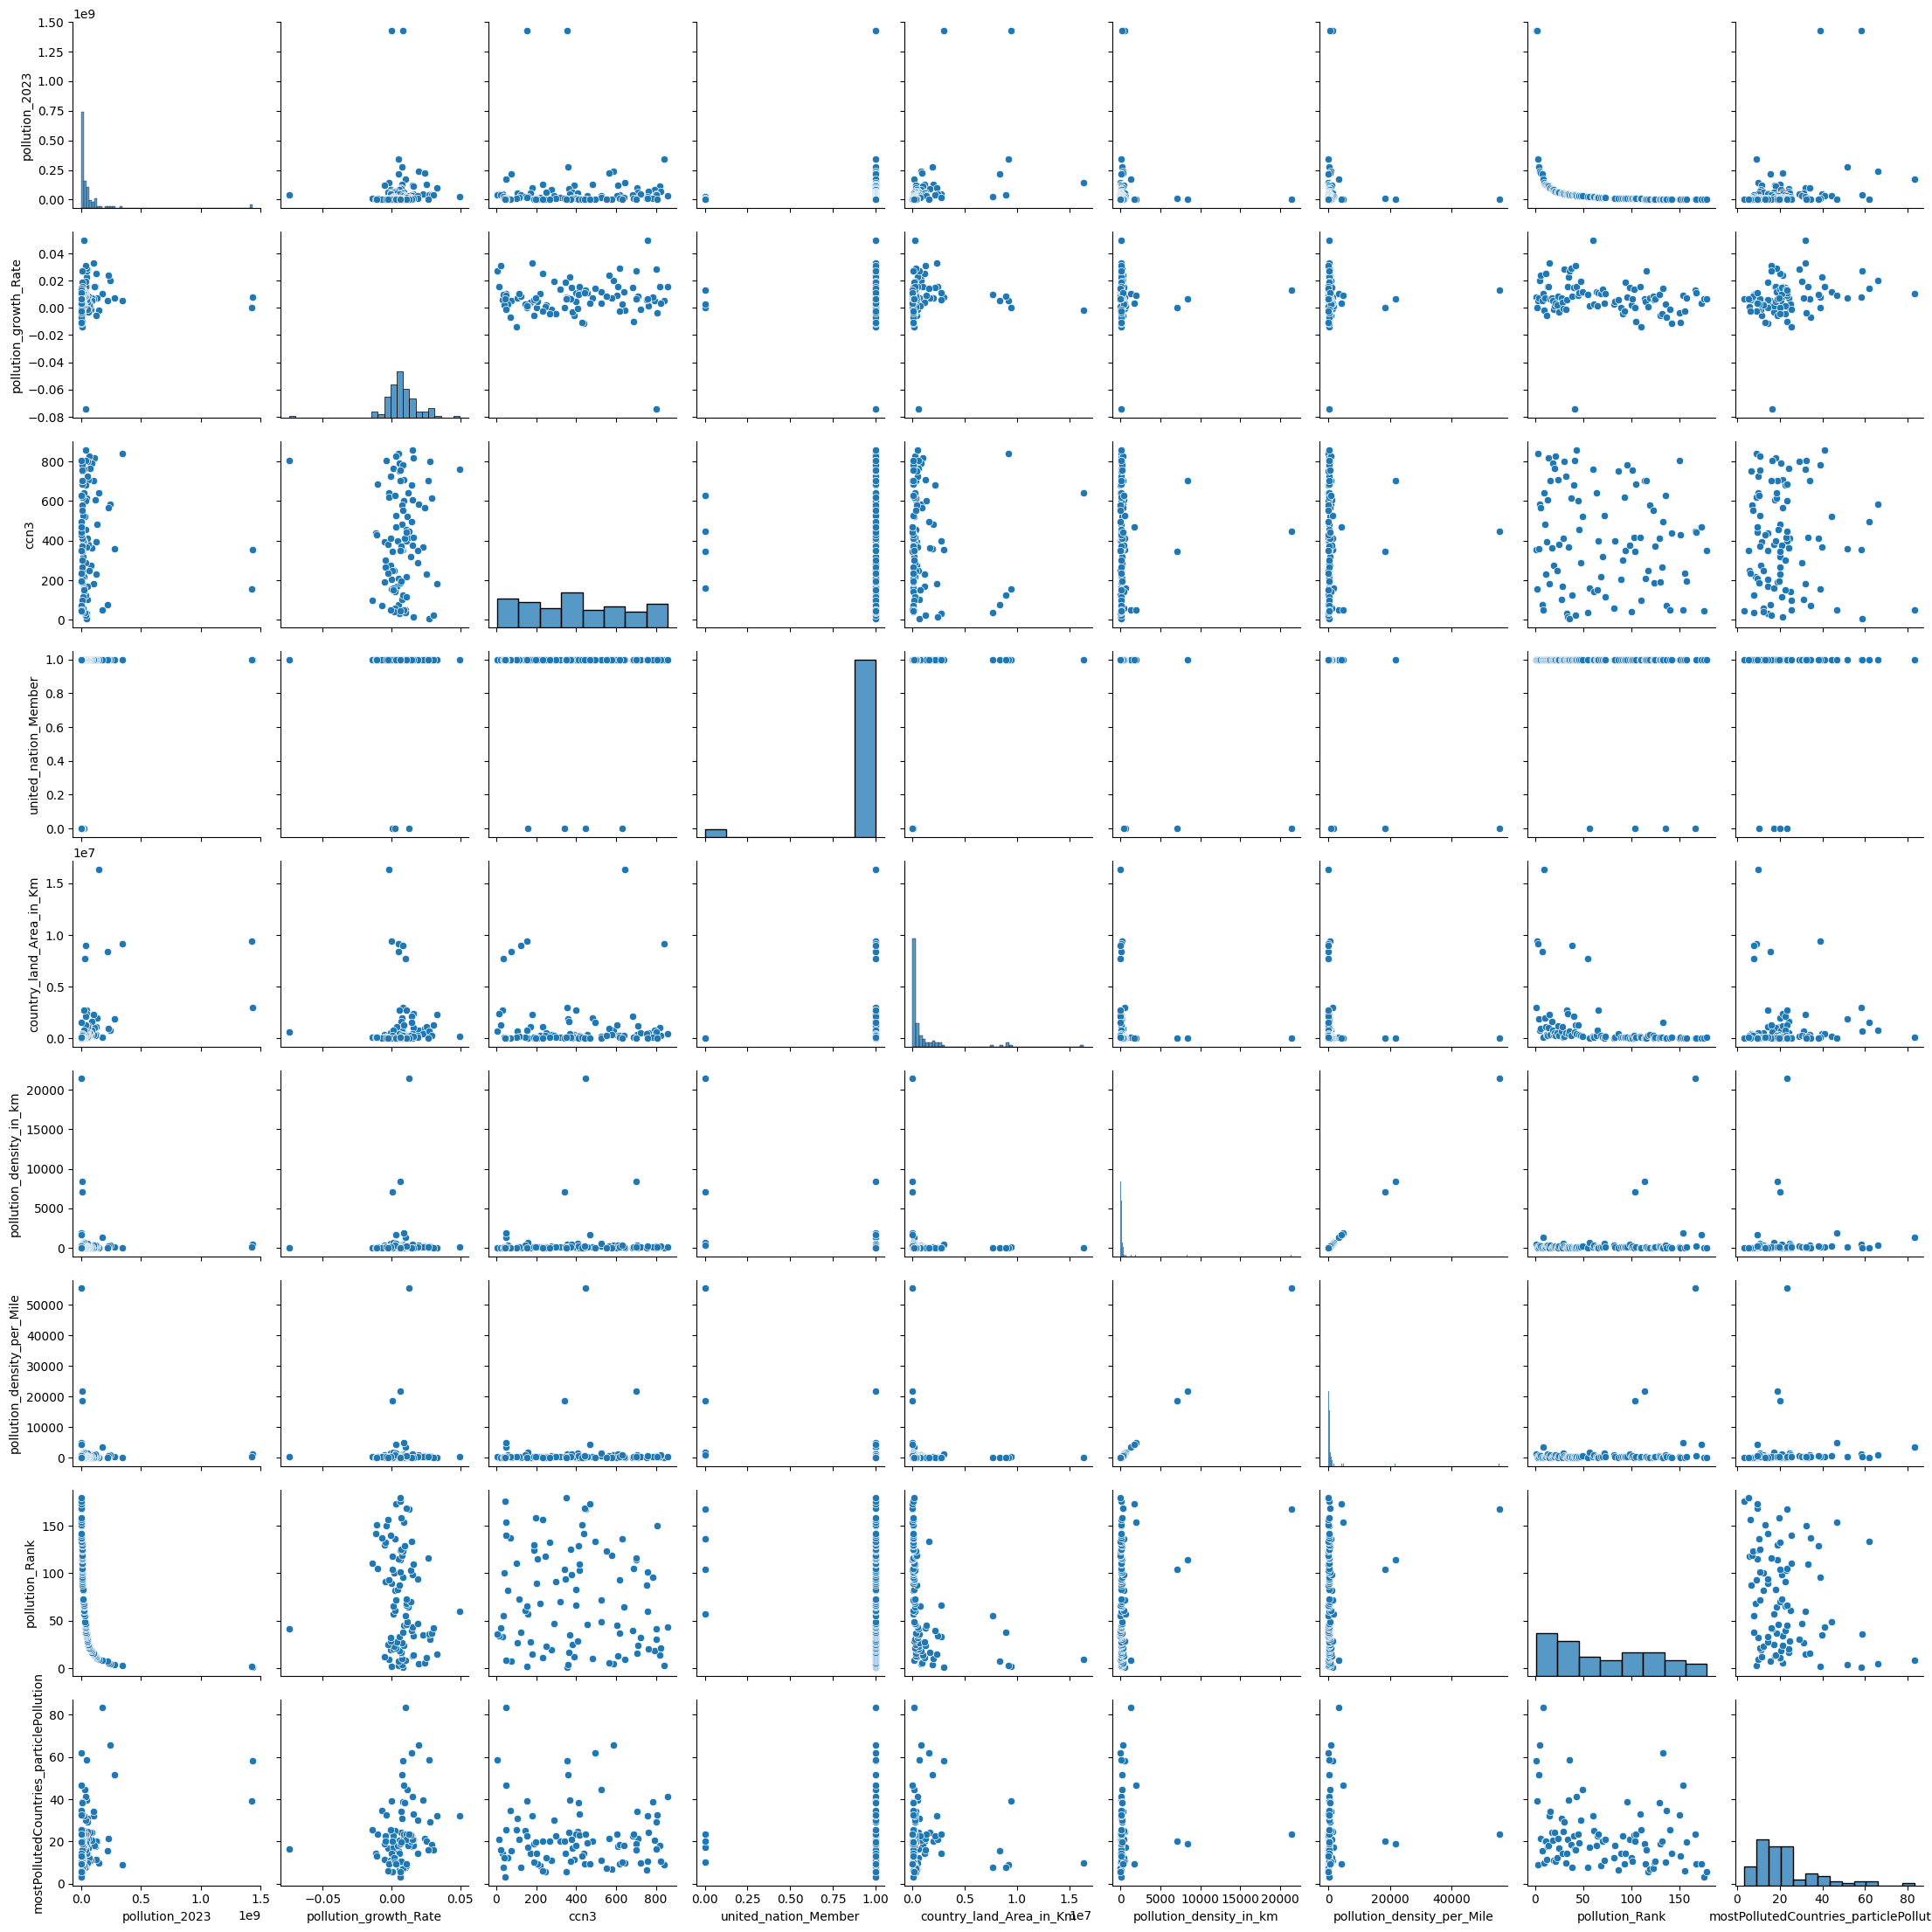

In [ ]:
sns.pairplot(df)

Text(0.5, 1.0, 'Box plot Pollution Density (km) for each region')

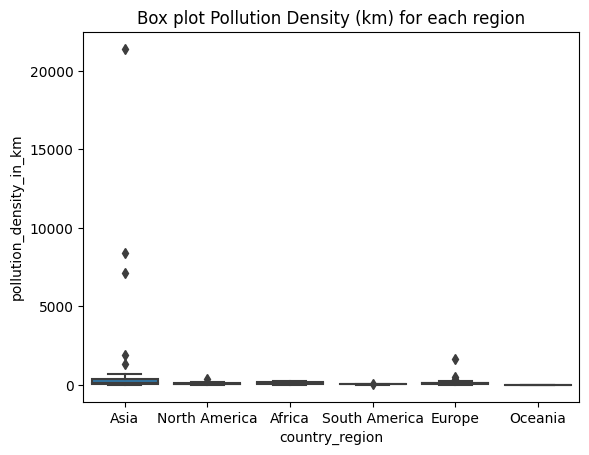

In [ ]:
sns.boxplot(y=df.pollution_density_in_km,x=df.country_region)
plt.title('Box plot Pollution Density (km) for each region')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Oceania'),
  Text(1, 0, 'South America'),
  Text(2, 0, 'North America'),
  Text(3, 0, 'Europe'),
  Text(4, 0, 'Africa'),
  Text(5, 0, 'Asia')])

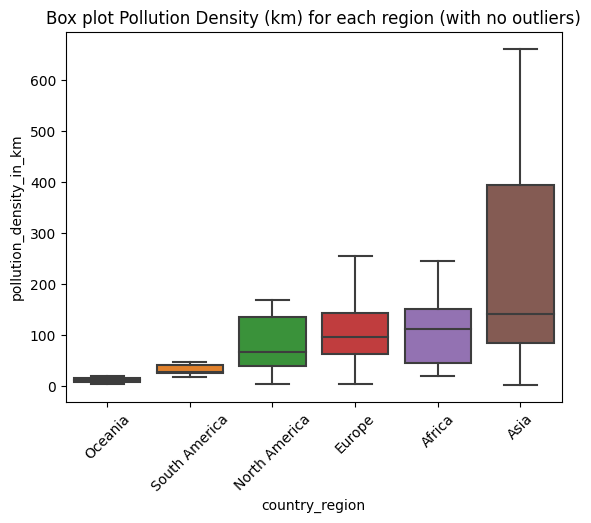

In [ ]:
sns.boxplot(y=df.pollution_density_in_km,x=df.country_region, showfliers=False, order = df.groupby('country_region')['pollution_density_in_km'].agg('median').sort_values().index)
plt.title('Box plot Pollution Density (km) for each region (with no outliers)')
plt.xticks(rotation=45)

Asia contributes the most to the pollution of the environment; it the widest range of values in pollution density.
Oceania contributes the least.

Text(0.5, 1.0, 'Ranking regions by median Pollution density(km)')

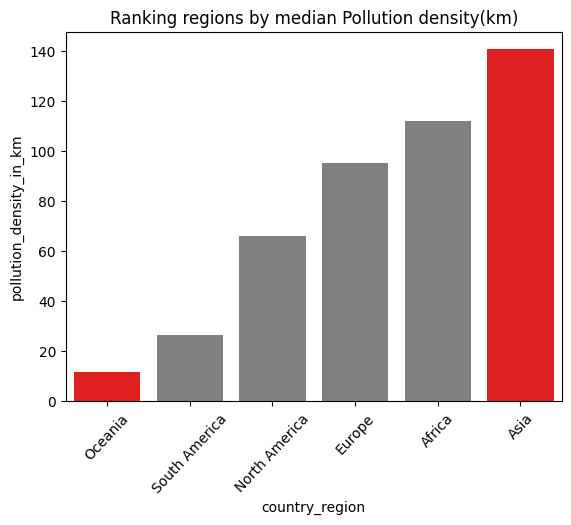

In [ ]:
sns.barplot(y=df.pollution_density_in_km,x=df.country_region,estimator='median',palette=['red','grey','grey','grey','grey','red'],errorbar=None, order = df.groupby('country_region')['pollution_density_in_km'].agg('median').sort_values().index)
plt.xticks(rotation=47)
plt.title('Ranking regions by median Pollution density(km)')

In [ ]:
regions = [asia,africa,oceania,south_am,north_am,europe]

Text(0.5, 1.0, 'Mean Pollution Growth Rate per Country Region')

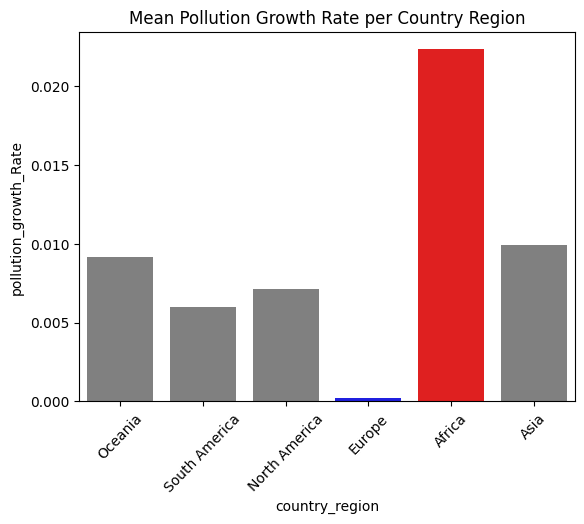

In [ ]:
sns.barplot(y=df.pollution_growth_Rate,x=df.country_region,estimator='mean',palette=['grey','grey','grey','blue','red','grey'],errorbar=None, order = df.groupby('country_region')['pollution_density_in_km'].agg('median').sort_values().index)
plt.xticks(rotation=46)
plt.title('Mean Pollution Growth Rate per Country Region')

Africa has the highest pollution growth rate and Europ has the lowest.

Text(0.5, 1.0, 'Median Pollution Growth Rate per Country Region')

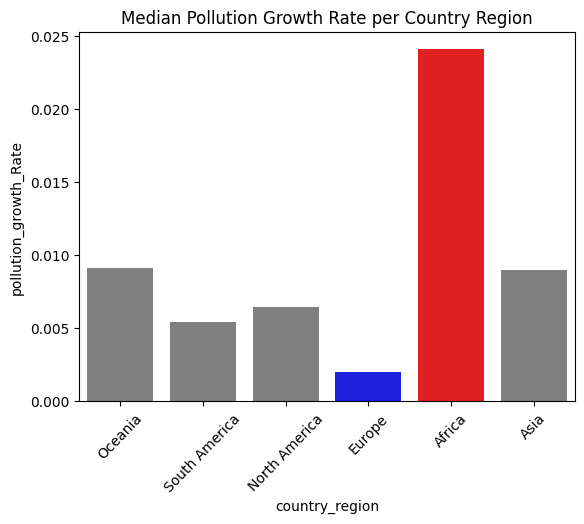

In [ ]:
sns.barplot(y=df.pollution_growth_Rate,x=df.country_region,estimator='median',palette=['grey','grey','grey','blue','red','grey'],errorbar=None, order = df.groupby('country_region')['pollution_density_in_km'].agg('median').sort_values().index)
plt.xticks(rotation=46)
plt.title('Median Pollution Growth Rate per Country Region')

Text(0, 0.5, 'Particle Pollution')

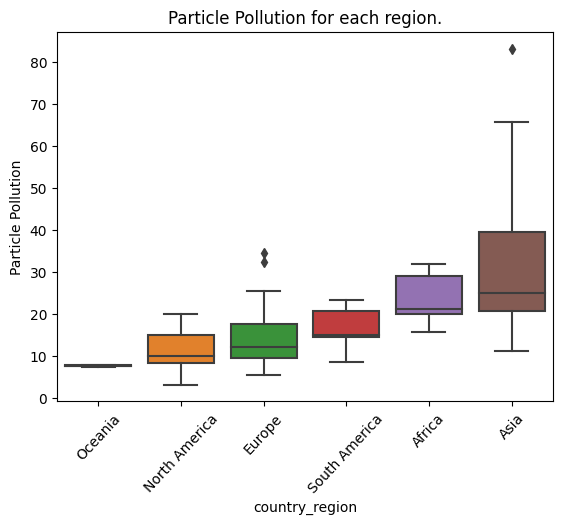

In [ ]:
sns.boxplot(x=df.country_region,y=df.mostPollutedCountries_particlePollution, order=df.groupby('country_region')['mostPollutedCountries_particlePollution'].agg('mean').sort_values().index)
plt.xticks(rotation=47)
plt.title('Particle Pollution for each region.')
plt.ylabel('Particle Pollution')

Asia has the most polluting particles released and Oceania releases the least polluting particles.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Oceania'),
  Text(1, 0, 'North America'),
  Text(2, 0, 'Europe'),
  Text(3, 0, 'South America'),
  Text(4, 0, 'Africa'),
  Text(5, 0, 'Asia')])

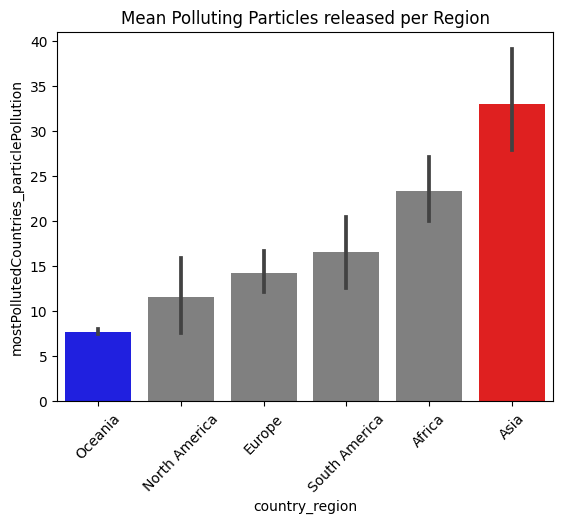

In [ ]:
sns.barplot(x=df.country_region,y=df.mostPollutedCountries_particlePollution, estimator='mean',palette=['blue','grey','grey','grey','grey','red'], order = df.groupby('country_region')['mostPollutedCountries_particlePollution'].agg('mean').sort_values().index)
plt.title('Mean Polluting Particles released per Region')
plt.xticks(rotation=46)